In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
prices = pd.read_csv('prices.csv')
wind = pd.read_csv('wind_power_cleaned.csv')
grid_excess = pd.read_csv('grid_excess.csv')

In [23]:
prices['date'] = pd.to_datetime(prices['date'])
wind['date'] = pd.to_datetime(wind['date'])

In [24]:
data = pd.merge(prices, wind, on=['date', 'hour'], how='outer')

#select every 18th day and save that to a new dataframe
data['date'] = pd.to_datetime(data['date'])

In [25]:
#show rows with nan values
data[data.isnull().any(axis=1)]

,date,hour,price,wind power
7160,2023-10-26,9,70.47,NaN
7161,2023-10-26,10,70.50,NaN
7162,2023-10-26,11,74.21,NaN
7163,2023-10-26,12,74.17,NaN
7223,2023-10-29,0,14.05,NaN
8760,2023-03-26,2,NaN,41.735484


In [26]:
#get a list of every 18th day in 2023
selected_dates = pd.date_range(start='2023-01-01', end='2023-12-31', freq='19D')

In [27]:
#select every 18th day
scenarios_price = {}
scenarios_wind = {}
i=1
for date in selected_dates:
    scenarios_price[i] = prices[prices['date'] == date].reset_index(drop=True).drop(columns=['date', 'hour'])
    scenarios_wind[i] = wind[wind['date'] == date].reset_index(drop=True).drop(columns=['date', 'hour'])
    i+=1

In [28]:
#make 20 times 20 times 2 scenarios
scenarios = {}
i=1
for price in scenarios_price:
    for wind in scenarios_wind:
        for grid in grid_excess:
            df = pd.merge(scenarios_price[price], scenarios_wind[wind], left_index=True, right_index=True)
            #add column with grid excess
            df['grid_excess'] = grid_excess[grid]
            scenarios[i] = df
            i+=1

In [30]:
#pick 200 random scenarios and save them in one dataframe
import random
random.seed(42)
random_scenarios = random.sample(range(1, 1201), 250)

scenarios_200 = pd.DataFrame()
counter = 1
for i in random_scenarios:
    #add df columnwise to the dataframe without concat
    #scenarios[i].columns = [str(col) + '_'+str(counter) for col in scenarios[i].columns]
    scenarios_200 = pd.concat([scenarios_200, scenarios[i]] , axis=1)
    counter+=1

In [31]:
#sum up the columns with same name
scenarios_overview= scenarios_200.groupby(level=0, axis=1).mean()
scenarios_overview['grid_excess_average'] = scenarios_overview['grid_excess']

#set value to one, if grid excess is greater than 0.5
scenarios_overview['grid_excess_average'] = np.where(scenarios_overview['grid_excess_average'] > 0.5, 1, 0)

C:\Users\janle\AppData\Local\Temp\ipykernel_29012\3411735575.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  scenarios_overview= scenarios_200.groupby(level=0, axis=1).mean()


In [32]:
scenarios_overview

,grid_excess,price,wind power,grid_excess_average
0,0.644,100.83104,63.424258,1
1,0.000,95.91500,61.684532,0
2,0.676,92.53152,61.053592,1
3,0.676,89.24952,58.462767,1
4,0.680,89.45560,54.095273,1
5,0.644,95.64608,51.430216,1
6,1.000,106.38908,49.853044,1
7,0.320,115.93236,49.941336,0
8,0.000,117.89904,50.965217,0
9,1.000,101.09744,53.238978,1


<AxesSubplot: >

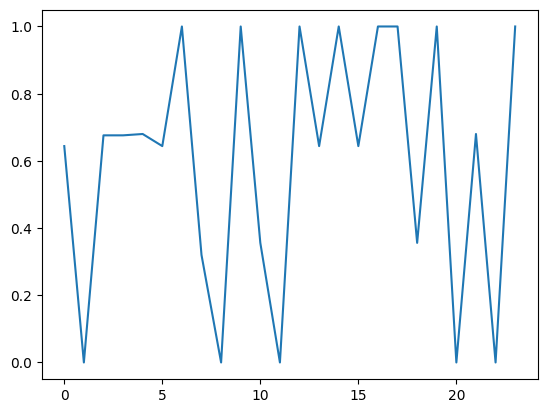

In [33]:
#plot the grid excess average
scenarios_overview['grid_excess'].plot()

In [34]:
scenarios_200.describe()

,price,wind power,grid_excess,price,wind power,grid_excess,price,wind power,grid_excess,price,...,grid_excess,price,wind power,grid_excess,price,wind power,grid_excess,price,wind power,grid_excess
count,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,...,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000,24.000000
mean,145.692500,128.258737,0.583333,16.535000,6.138023,0.583333,122.590417,16.064036,0.625000,81.016667,...,0.583333,18.830000,59.701028,0.583333,180.659583,16.064036,0.583333,133.427500,59.701028,0.625000
std,27.655634,22.425394,0.503610,22.210323,6.002071,0.503610,28.711655,6.798607,0.494535,22.783694,...,0.503610,17.415656,30.485584,0.503610,28.156248,6.798607,0.503610,34.895204,30.485584,0.494535
min,104.350000,78.069516,0.000000,-0.380000,0.741931,0.000000,86.910000,3.912145,0.000000,36.820000,...,0.000000,-1.430000,19.196048,0.000000,142.440000,3.912145,0.000000,85.570000,19.196048,0.000000
25%,122.572500,113.469839,0.000000,0.040000,1.287448,0.000000,103.580000,11.030452,0.000000,69.855000,...,0.000000,0.012500,25.418367,0.000000,149.762500,11.030452,0.000000,111.387500,25.418367,0.000000
50%,136.370000,137.826452,1.000000,0.825000,4.509734,1.000000,112.205000,15.604040,1.000000,82.355000,...,1.000000,16.060000,64.280081,1.000000,181.995000,15.604040,1.000000,127.905000,64.280081,1.000000
75%,165.845000,143.310645,1.000000,38.652500,7.417306,1.000000,137.795000,21.548302,1.000000,93.467500,...,1.000000,37.067500,81.351694,1.000000,203.157500,21.548302,1.000000,151.287500,81.351694,1.000000
max,197.490000,151.992419,1.000000,55.570000,22.337242,1.000000,190.710000,28.267274,1.000000,125.580000,...,1.000000,46.830000,108.439516,1.000000,235.060000,28.267274,1.000000,216.190000,108.439516,1.000000


In [35]:
#save as csv
scenarios_200.to_csv('scenarios_200.csv', index=False)